# $k$-Nearest Neighbors
## Dataset: Wine Data Set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import data
from sklearn.datasets import load_wine

# Load data
wine = load_wine()

# Description of data
print(wine.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

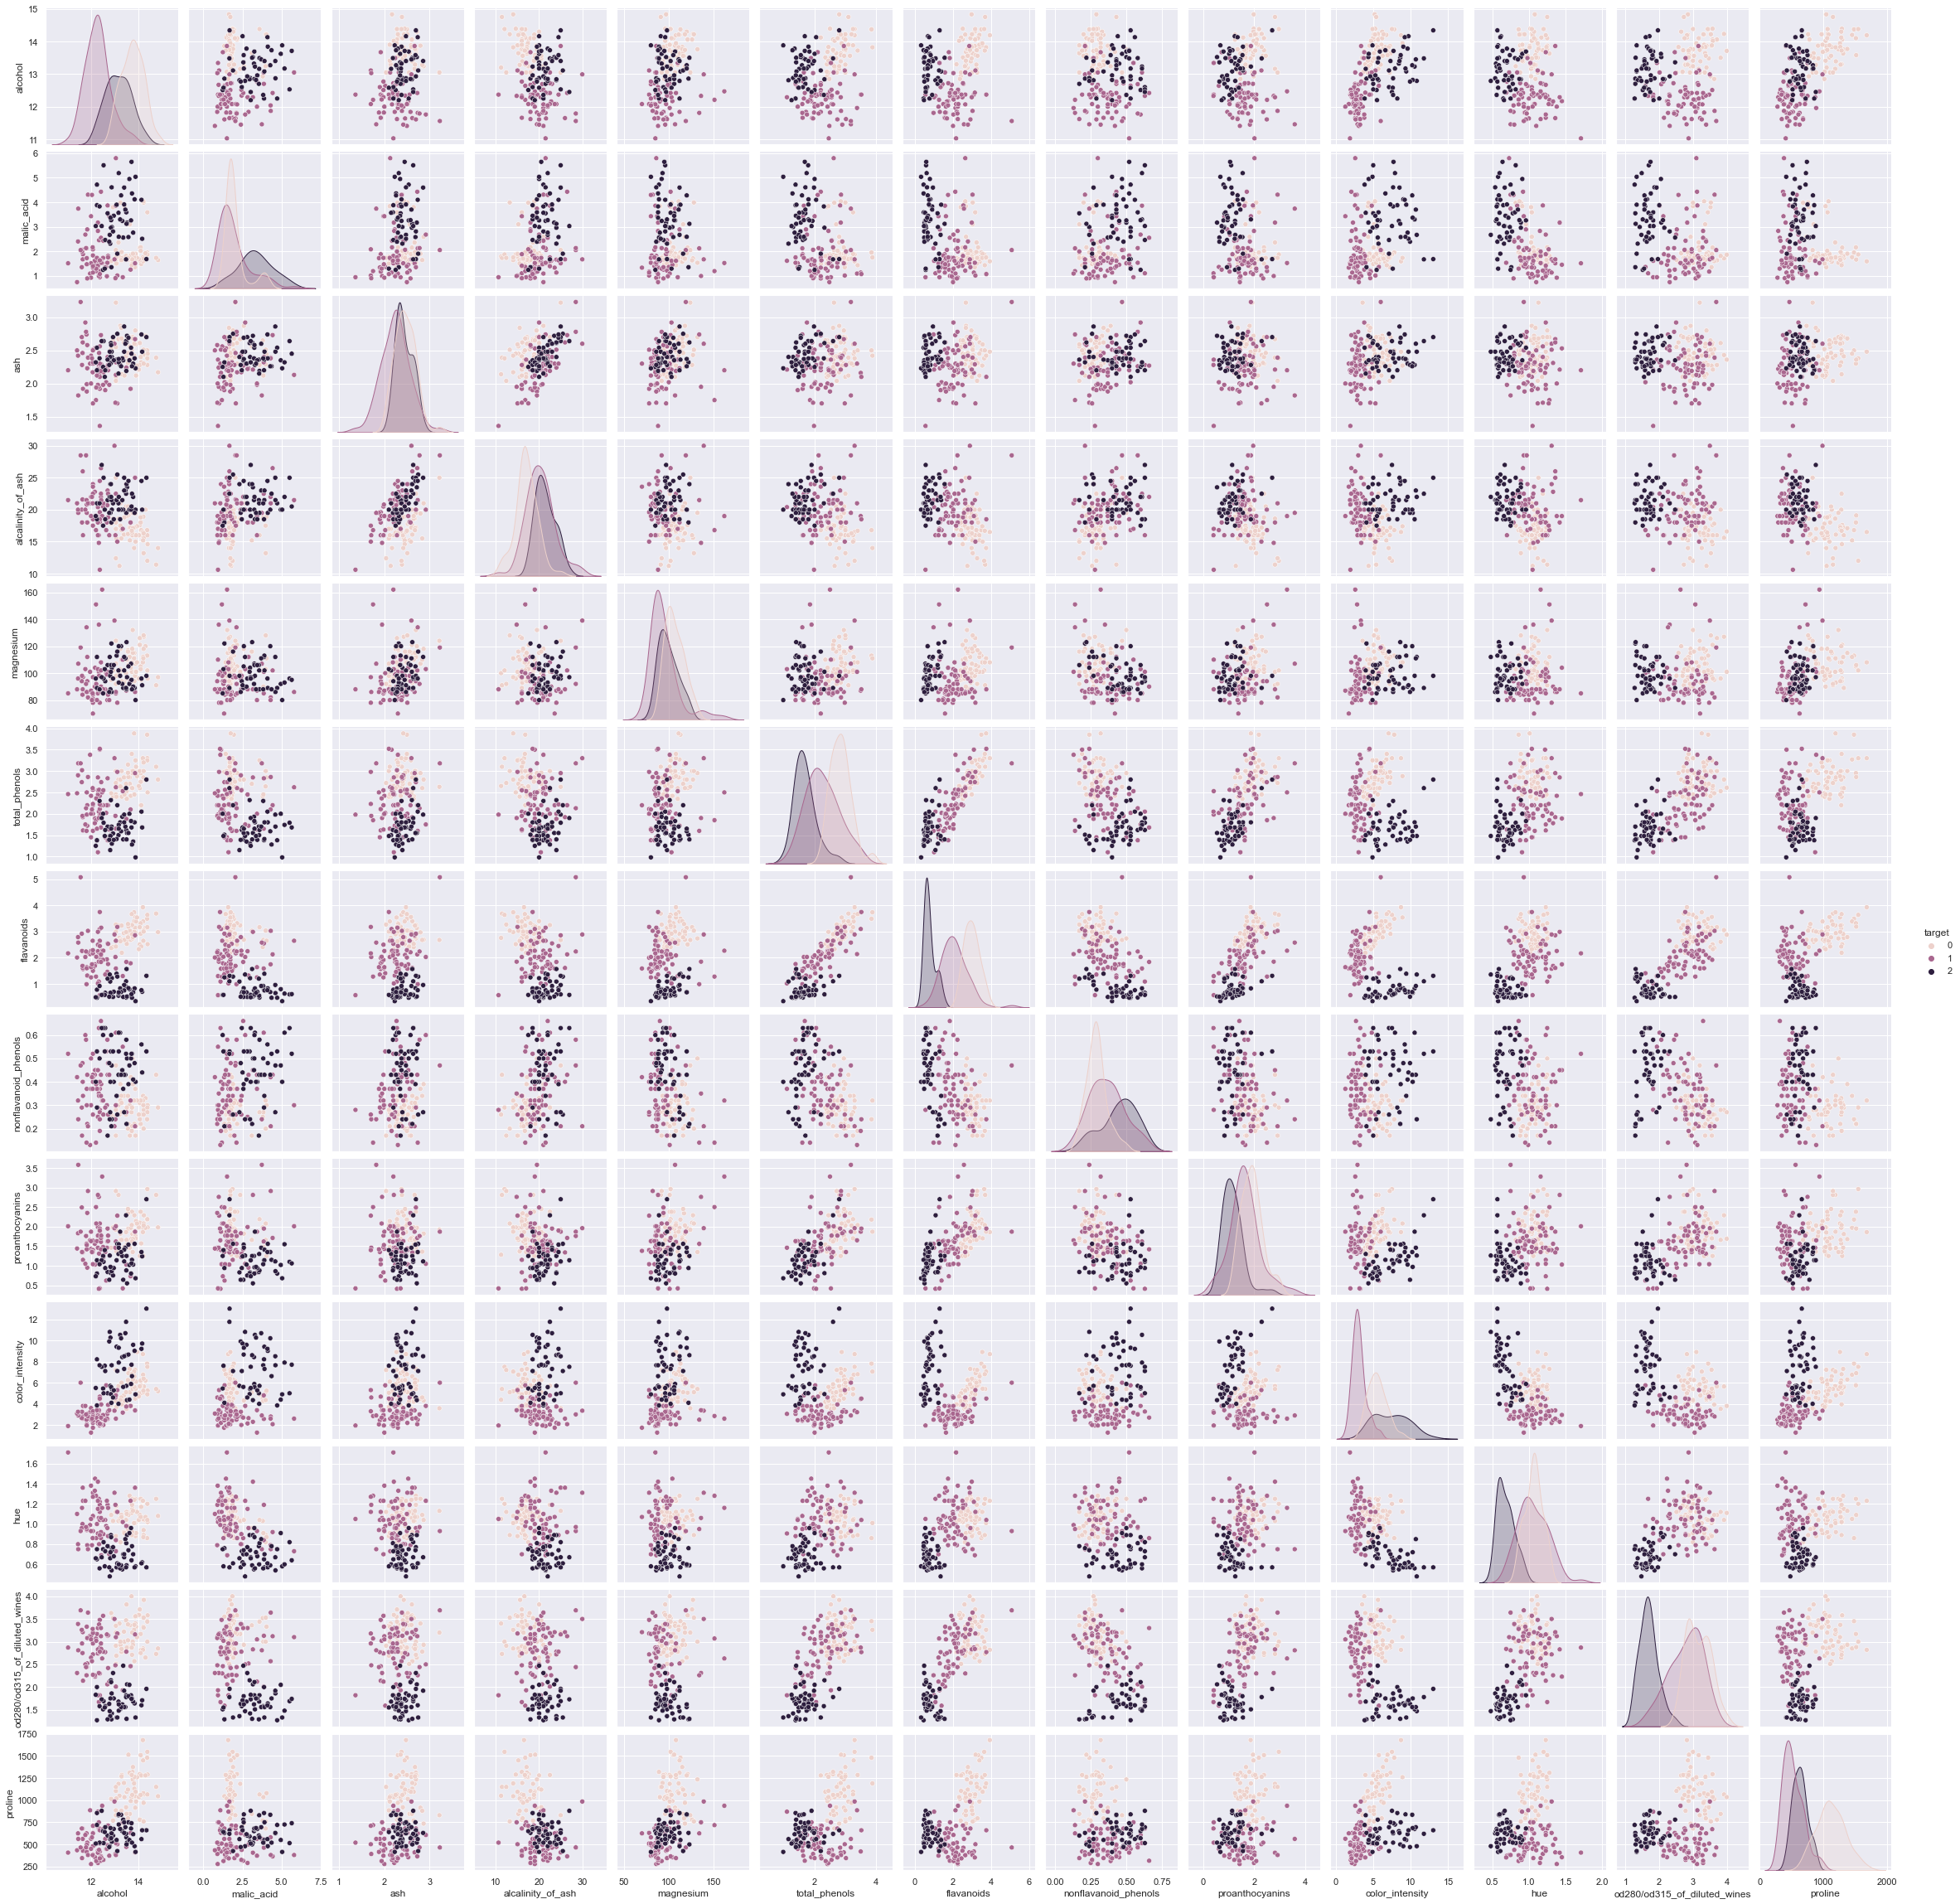

In [2]:
# Plotting the data
# Create a dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Plotting the data
sns.pairplot(df, hue='target', vars=wine.feature_names)
plt.show()

In [3]:
## Step 1: Data Preprocessing
# Load dataset
X = wine.data
y = wine.target

# Optionally, you can split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print Shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(142, 13)
(36, 13)
(142,)
(36,)


In [4]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
## Step 2: KNN Classifier
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


In [6]:
## Step 3: Model Training and Predictions
# Create a KNN classifier
# Create a KNN classifier and test its accuracy
classifier = KNN(k=3)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9444444444444444


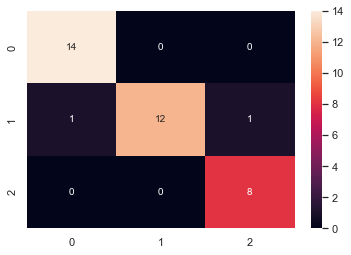

In [7]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)
plt.show()


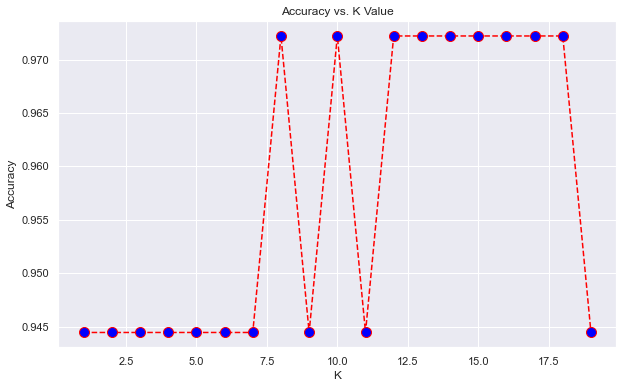

In [11]:
# Train different KNN models and plot the accuracies for each k
accuracies = []
for k in range(1, 20):
    classifier = KNN(k=k)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    accuracies.append(accuracy)

# Plotting the accuracies for different k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), accuracies, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()